# <font color=green> **DADOS VOLVE: GUIA DE ACESSO E PRIMEIROS PASSOS**
-----

## Objetivo:
- Mostrar como acessar os dados do Volve que estão no Azure Storage Explorer pelo Python.

- Funções iniciais e básicas para manipular esses dados (exportar, listar arquivos dentro de uma pasta, ler, etc.

- 2 exemplos introdutórios de dados.


## Tópicos:
1.   Instalação e Importação do Pacote Azure-storage-blob
2.   Funções para Leitura e Manipulação de Arquivos Volve
3.   Exemplo 1 - Leitura de Arquivo de Produção
4.   Exemplo 2 - Leitura de Arquivo de Perfuração

## 1. Instalando e importando pacote azure-storage-blob



  **1. Documentação:** 

Link: https://pypi.org/project/azure-storage-blob/0.37.1/

<br>

Link: https://docs.microsoft.com/en-us/python/api/azure-storage-blob/azure.storage.blob.blockblobservice.blockblobservice?view=azure-python-previous

<br>

  **2. Para que serve?** 

O armazenamento de Blob do Azure é a solução de armazenamento de objetos da Microsoft para a nuvem. Armazena grandes quantidades de dados não estruturados.

<br>

**3. Como funciona?**

- Precisamos autenticar o cliente pela chave de acesso. Ou seja, fornecemos nossa senha pelo comando, para conseguir entrar na conta de armazenamento.

Fazemos isso com a classe:

          BlockBlobService(account_name=None, account_key=None,   sas_token=None, is_emulated=False, protocol='https', endpoint_suffix='core.windows.net', custom_domain=None


In [ ]:
# Passo 1: instalando o pacote azure-store-blob que irá permitir ter acesso aos dados

!pip install azure-storage-blob==0.37.1

     |████████████████████████████████| 77 kB 3.5 MB/s 
     |████████████████████████████████| 49 kB 4.3 MB/s 
     |████████████████████████████████| 3.5 MB 22.1 MB/s 


In [ ]:
# Passo 2:  Importando a classe para termos acesso aos dados (autentica o cliente pela chave de acesso)

from azure.storage.blob import BlockBlobService

In [ ]:
# Passo 3: Esta parte é muito importante: Precisamos entrar com o nome da conta e o token. Estas informações temos acesso no Gerenciador de Armazenamento do Azure

azure_storage_account_name = 'datavillagesa'        
sas_token = 'sv=******' # register and use your key (see instructions at presentation)

In [ ]:
# Passo 4: Chamar a classe BlockBlobService - acessa contêineres e blobs dentro dele. Fornece operações para recuperar e configurar as propriedades da conta, bem como listar, criar e excluir contêineres dentro da conta.

sas_blob_service = BlockBlobService( 
    account_name=azure_storage_account_name, 
    sas_token=sas_token,
)

## 2. Funções para Leitura e Manipulação de Arquivos Volve

In [ ]:
# Funções:

# 1 - Função para listar os arquivos dentro de um blob, ou seja, ele vai retornar uma lista com todos os arquivos dentro de um caminho passado

def listar_arquivos(nome_blob = None):
  '''nome_blob : qual pasta você quer que liste os subarquivos dela. Por exemplo, 'Geophysical_Interpretations' listaria todas as subpastas dele'''
  
  # lista todos os blobs do container  
  blob_list = sas_blob_service.list_blobs('volve',prefix = nome_blob)               
  
  # criando a lista de nomes
  lista = [] 
  for blob in blob_list:
      lista.append(blob.name)
  
  return(lista)


# 2 - Função para exportar um conjunto de arquivos (ou algum arquivo) para uma determinada pasta do drive. ATENÇÃO: CUIDADO PARA NÃO EXPORTAR O VOLVE INTEIRO, POIS SERÃO 5 TB!!!

def exportar_arquivos(nome_blob1,container_name, file_path):
  ''' - nome_blob1 : local (pasta ou caminho) do blob que se quer copiar os arquivos. Por exemplo, 'Geophysical_Interpretations'  ou 
  'Well_logs_pr_WELL/15_9-F-4/14.DIV.REPORTS/PVT_ANALYSIS_REPORT_1.PDF'

  - container_name:  Nome do Container, no nosso caso, 'volve'

  - file_path: qual pasta seus arquivos serão salvos. Notar que ele vai criar subpastas a partir do arquivo criado, de acordo com as subpastas do container'''

  import os
  elementos = listar_arquivos(nome_blob = nome_blob1)
  
  for elemento in elementos:
    if not os.path.exists(file_path + elemento[0:- len(elemento.split('/')[-1])]):
        os.makedirs(file_path + elemento[0:- len(elemento.split('/')[-1])])
    file_path1 = elemento.split('/')[-1]
    sas_blob_service.get_blob_to_path(container_name = container_name, blob_name = elemento, file_path = file_path + elemento)



# 3 - Como visualizar algum determinado arquivo de TEXTO

def print_arquivo_texto(container_name, blob_name):
  ''' container_name = Nome do Container, no nosso caso, 'volve'
  blob_name = É algum arquivo de TEXTO que se quer ler (pode ser dat).
  Por exemplo: 'Geophysical_Interpretations/Wells/Well_perforations_Volve.dat'  '''
  
  a = sas_blob_service.get_blob_to_text(container_name, blob_name, encoding='utf-8')
  print(a.content)
  print(a.name)


# 4 - Ler arquivos do drive

def ler_arquivos_texto(local):
  '''Para este caso já é necessário ter o arquivo no espaço físico do computador/ou drive. local é o caminho do arquivo que se quer ler'''
  import pandas as pd
  ext = local.split('.')[-1]
  if ext == 'xlsx' or ext == 'xls':
    df = pd.read_excel(local, sheet_name=None)  # garante que irá ler as diferentes abas da planilha
  else:
    try:
      df = pd.read_fwf(local)
    except:
      df = 'O arquivo não pode ser lido. Provavelmente não é um arquivo de texto.'
  return(df) 


### Exemplos de como usar as funções:

#### Ex0: Como printar um arquivo DE TEXTO?

In [ ]:
# Entradas: 
container_name = 'volve'
blob_name = 'Geophysical_Interpretations/Wells/Well_perforations_Volve.dat'   # arquivo a ser lido
#blob_name = 'Geophysical_Interpretations/Horizons/Horizons_TWT/Timelapse_Horizons/sidelobe_Base_Hugin+ST10010-ST0202+PUB+TIME.dat'
#blob_name = 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/MetaFileInfo.txt'

print_arquivo_texto(container_name, blob_name)


#### Ex1: Como fazer para ver o caminho dos arquivos que estão na pasta? 


In [ ]:
# Saídas possíveis:

# Ex1: Como que eu faço para ver o caminho dos arquivos que estão na pasta 

# Entradas: Nome da Pasta que se quer avaliar 
nome_blob1 ='Geophysical_Interpretations'   

# Usar a função listar_arquivos
arquivos_pasta_nomeblob1 = listar_arquivos(nome_blob = nome_blob1)

# Saída - imprimindo o resultado

## Em lista:
print(arquivos_pasta_nomeblob1)

## Em dataframe:
import pandas as pd
pd.options.display.max_colwidth = 100   # para aumentar o número de caracteres lida por coluna no dataframe
pd.DataFrame(arquivos_pasta_nomeblob1, columns=['Lista de Arquivos'])



#### Ex2: Como fazer para exportar certos arquivos lidos para uma determinada pasta no drive

In [ ]:
# entradas:

# de qual pasta/caminho quer copiar os arquivos
#nome_blob1 = 'Geophysical_Interpretations'
#nome_blob1 = 'Well_logs_pr_WELL/15_9-F-4/14.DIV.REPORTS/PVT_ANALYSIS_REPORT_1.PDF'
#nome_blob1 = 'Well_logs_pr_WELL/15_9-19 B&BT2/14.DIV.REPORTS/11.TIF'
nome_blob1 = 'Well_technical_data/Daily Drilling Report - HTML Version/'


file_path = '/content/drive/MyDrive/Volve Dados Saidas/'    # em qual pasta seus arquivos serão salvos  
container_name = 'volve'                                    # Qual o nome do container

# A função que faz o processo (pode checar na pasta criada)
exportar_arquivos(nome_blob1,container_name, file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Ex3 : E agora, como ler determinado arquivo do drive gerado com o Python?

Importante:


Existem diferentes tipos de arquivos para serem lidos. Por enquanto, conseguimos ler arquivos do tipo dat, de texto (txt ou csv) e .xlsx


Próximos passos é contemplar os outros tipos de arquivos (caso seja possível abrir).

In [ ]:
# Ler arquivos do drive

# xlsx
local = '/content/drive/MyDrive/Volve Dados Saidas/Production_data/Volve production data.xlsx'
df = ler_arquivos_texto(local)


In [ ]:
df

{'Daily Production Data':          DATEPRD  WELL_BORE_CODE  ...   FLOW_KIND WELL_TYPE
 0     2014-04-07   NO 15/9-F-1 C  ...  production        WI
 1     2014-04-08   NO 15/9-F-1 C  ...  production        OP
 2     2014-04-09   NO 15/9-F-1 C  ...  production        OP
 3     2014-04-10   NO 15/9-F-1 C  ...  production        OP
 4     2014-04-11   NO 15/9-F-1 C  ...  production        OP
 ...          ...             ...  ...         ...       ...
 15629 2016-09-14  NO 15/9-F-5 AH  ...  production        OP
 15630 2016-09-15  NO 15/9-F-5 AH  ...  production        OP
 15631 2016-09-16  NO 15/9-F-5 AH  ...  production        OP
 15632 2016-09-17  NO 15/9-F-5 AH  ...  production        OP
 15633 2016-09-18  NO 15/9-F-5 AH  ...   injection        WI
 
 [15634 rows x 24 columns],
 'Monthly Production Data':     Wellbore name  NPDCode    Year  Month  ...          Gas    Water   GI   WI
 0             NaN      NaN     NaN    NaN  ...          Sm3      Sm3  Sm3  Sm3
 1      15/9-F-1 C   7405.

# Exemplo 1: Leitura de Arquivo de Produção




Dataset:

Arquivos da Planilha Volve production data.xlsx

- Conjunto de histórico de produção real. Contém duas planilhas, "Daily Production Data" e "Monthly Production Data". 

<br>

- Medidas: Choke, pressões e temperaturas, volume de óleo, água, gás, tipo do poço (injetor ou produtor), tipo de fluxo




### Quais arquivos temos na planilha Volve Production Data?

In [ ]:
# Quais planilhas temos no arquivo df?
df.keys()

dict_keys(['Daily Production Data', 'Monthly Production Data'])

In [ ]:
# Criando os dataframes -> df1: produção diária por poço; df2: produção mensal por poço
df1 = df['Daily Production Data']
df2 = df['Monthly Production Data']

### Análise do Daily Production Data

In [ ]:
# cabeçalho do arquivo
df1.head()

DATEPRD WELL_BORE_CODE  ...   FLOW_KIND WELL_TYPE
0 2014-04-07  NO 15/9-F-1 C  ...  production        WI
1 2014-04-08  NO 15/9-F-1 C  ...  production        OP
2 2014-04-09  NO 15/9-F-1 C  ...  production        OP
3 2014-04-10  NO 15/9-F-1 C  ...  production        OP
4 2014-04-11  NO 15/9-F-1 C  ...  production        OP

[5 rows x 24 columns]

In [ ]:
# Tamanho do arquivo  (linhas, colunas)
df1.shape

(15634, 24)

In [ ]:
# Quais colunas temos?
df1.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [ ]:
# Analisando a quantidade de valores diferentes na coluna (para eliminar colunas com dados iguais e colunas redundantes)

# Quantidade de valores diferentes:
print('Quantidade de valores diferentes por coluna:')
print(df1.apply(lambda x: len(pd.unique(x).tolist())))
print("")

# Valores diferentes:
print('Valores diferentes por coluna:')
print(df1.apply(lambda x: pd.unique(x).tolist()))

Quantidade de valores diferentes por coluna:
DATEPRD                     3327
WELL_BORE_CODE                 7
NPD_WELL_BORE_CODE             7
NPD_WELL_BORE_NAME             7
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                926
AVG_DOWNHOLE_PRESSURE       6568
AVG_DOWNHOLE_TEMPERATURE    6462
AVG_DP_TUBING               8685
AVG_ANNULUS_PRESS           6645
AVG_CHOKE_SIZE_P            6420
AVG_CHOKE_UOM                  2
AVG_WHP_P                   8830
AVG_WHT_P                   8794
DP_CHOKE_SIZE               9058
BORE_OIL_VOL                7819
BORE_GAS_VOL                8006
BORE_WAT_VOL                7362
BORE_WI_VOL                 5259
FLOW_KIND                      2
WELL_TYPE                      2
dtype: int64

Valores diferentes por coluna:
DATEPRD                     [1396828800000000000, 1396915200000000000, 1397001600000000000, 1397088000000000000, 13971

In [ ]:
# Seleção de variáveis a partir do que foi observado (remover variáveis repetidas ou só com um valor)

df1 = df1.loc[:,['DATEPRD', 'WELL_BORE_CODE','ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P','DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL','BORE_WI_VOL', 'FLOW_KIND']]


In [ ]:
df1.head()

DATEPRD WELL_BORE_CODE  ...  BORE_WI_VOL   FLOW_KIND
0 2014-04-07  NO 15/9-F-1 C  ...          NaN  production
1 2014-04-08  NO 15/9-F-1 C  ...          NaN  production
2 2014-04-09  NO 15/9-F-1 C  ...          NaN  production
3 2014-04-10  NO 15/9-F-1 C  ...          NaN  production
4 2014-04-11  NO 15/9-F-1 C  ...          NaN  production

[5 rows x 16 columns]

In [ ]:
df1.shape

(15634, 16)

In [ ]:
# Checando dados ausentes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   ON_STREAM_HRS             15349 non-null  float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_ANNULUS_PRESS         7890 non-null   float64       
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 8   AVG_WHP_P                 9155 non-null   float64       
 9   AVG_WHT_P                 9146 non-null   float64       
 10  DP_CHOKE_SIZE             15340 non-null  float64       
 11  BORE_OIL_VOL              9161 non-null   float64       
 12  BORE_GAS_VOL      

In [ ]:
df1['FLOW_KIND'].unique()

array(['production', 'injection'], dtype=object)

In [ ]:
# Quantos poços diferentes temos:

print('Todos os poços:')
print(f"Poços: {df1['WELL_BORE_CODE'].unique()}")
print('')

print(f"Poços de injeção: {df1.loc[df1['FLOW_KIND'] == 'injection',:]['WELL_BORE_CODE'].unique()}")
print('')

print(f"Poços de produção: {df1.loc[df1['FLOW_KIND'] == 'production',:]['WELL_BORE_CODE'].unique()}")

Todos os poços:
Poços: ['NO 15/9-F-1 C' 'NO 15/9-F-11 H' 'NO 15/9-F-12 H' 'NO 15/9-F-14 H'
 'NO 15/9-F-15 D' 'NO 15/9-F-4 AH' 'NO 15/9-F-5 AH']

Poços de injeção: ['NO 15/9-F-4 AH' 'NO 15/9-F-5 AH']

Poços de produção: ['NO 15/9-F-1 C' 'NO 15/9-F-11 H' 'NO 15/9-F-12 H' 'NO 15/9-F-14 H'
 'NO 15/9-F-15 D' 'NO 15/9-F-5 AH']


#### Gráfico que mostre a variável para diferentes poços:

In [ ]:
variavel = 'BORE_GAS_VOL'
df1.rename({'WELL_BORE_CODE': 'Well' },axis = 1, inplace = True)

In [ ]:
def grafico_variable_time(df1,x1 = "DATEPRD", y1 = variavel):
  import plotly.graph_objects as go
  import plotly.express as px

  #df1['DATEPRD'] = pd.to_datetime(df1['DATEPRD'])

#  df1.rename({'WELL_BORE_CODE': 'Well' },axis = 1, inplace = True)
  df_g = df1.to_dict()
  fig2 = px.line(df1, x=x1, y=y1, color="Well",color_discrete_sequence=px.colors.qualitative.G10)
  #color_discrete_sequence=px.colors.qualitative.G10,
  fig2.update_layout(height=400, width=1100,template="plotly_white",title_text='Variável ' + variavel + ' ao longo do tempo')

  fig2.update_traces(marker=dict(size=8,
                                line=dict(width=0.08,
                                          color='Grey')),
                    selector=dict(mode='markers'))


  fig2.show(renderer="colab")

In [ ]:
df1.columns

Index(['DATEPRD', 'Well', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
       'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL',
       'FLOW_KIND'],
      dtype='object')

In [ ]:
variavel = 'AVG_DOWNHOLE_PRESSURE'
grafico_variable_time(df1,x1 = "DATEPRD", y1 = variavel)

In [ ]:
variavel = 'BORE_OIL_VOL'
grafico_variable_time(df1,x1 = "DATEPRD", y1 = variavel)

#### Análise de Variáveis para determinado poço:

In [ ]:
# Poços:
df1['Well'].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

In [ ]:
def grafico_variaveis_por_well(df1, well ='NO 15/9-F-14 H', x1 = 'DATEPRD',z = 'BORE_OIL_VOL'):
  import matplotlib.pyplot as plt
  import seaborn as sns

  df_subset = df1.loc[df1['Well'] == well,:]

  df_grafico = df_subset.loc[:,['DATEPRD','Well','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
                                'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]

  fig = plt.figure(figsize=(25,25))
  for i in range(2,len(df_grafico.columns)):
    ax = fig.add_subplot(4,3,i-1)
  #  df_grafico['DATEPRD'] = pd.to_datetime(df_grafico['DATEPRD'])
  #  im = ax.scatter(df_grafico[['DATEPRD']],df_grafico[[df_grafico.columns[i]]],s=100, alpha=1,c=df_grafico[df_grafico.columns[10]],cmap='Spectral')  
    im = ax.scatter(df_grafico[[x1]],df_grafico[[df_grafico.columns[i]]],s=100, alpha=1,c=df_grafico[z],cmap='Spectral')     # gráfico de dispersão
    plt.xlabel('Data',fontsize=16,color = 'black')
    plt.ylabel(df_grafico.columns[i],fontsize=16,color = 'black')
    plt.xticks(fontsize=16,color = 'black')
    plt.yticks(fontsize=16,color = 'black')
    plt.grid(b='on')
  cbar = plt.colorbar(im, orientation = 'vertical')
  cbar.set_label(z, rotation=270, labelpad=20)
  fig.tight_layout(pad=1.5)


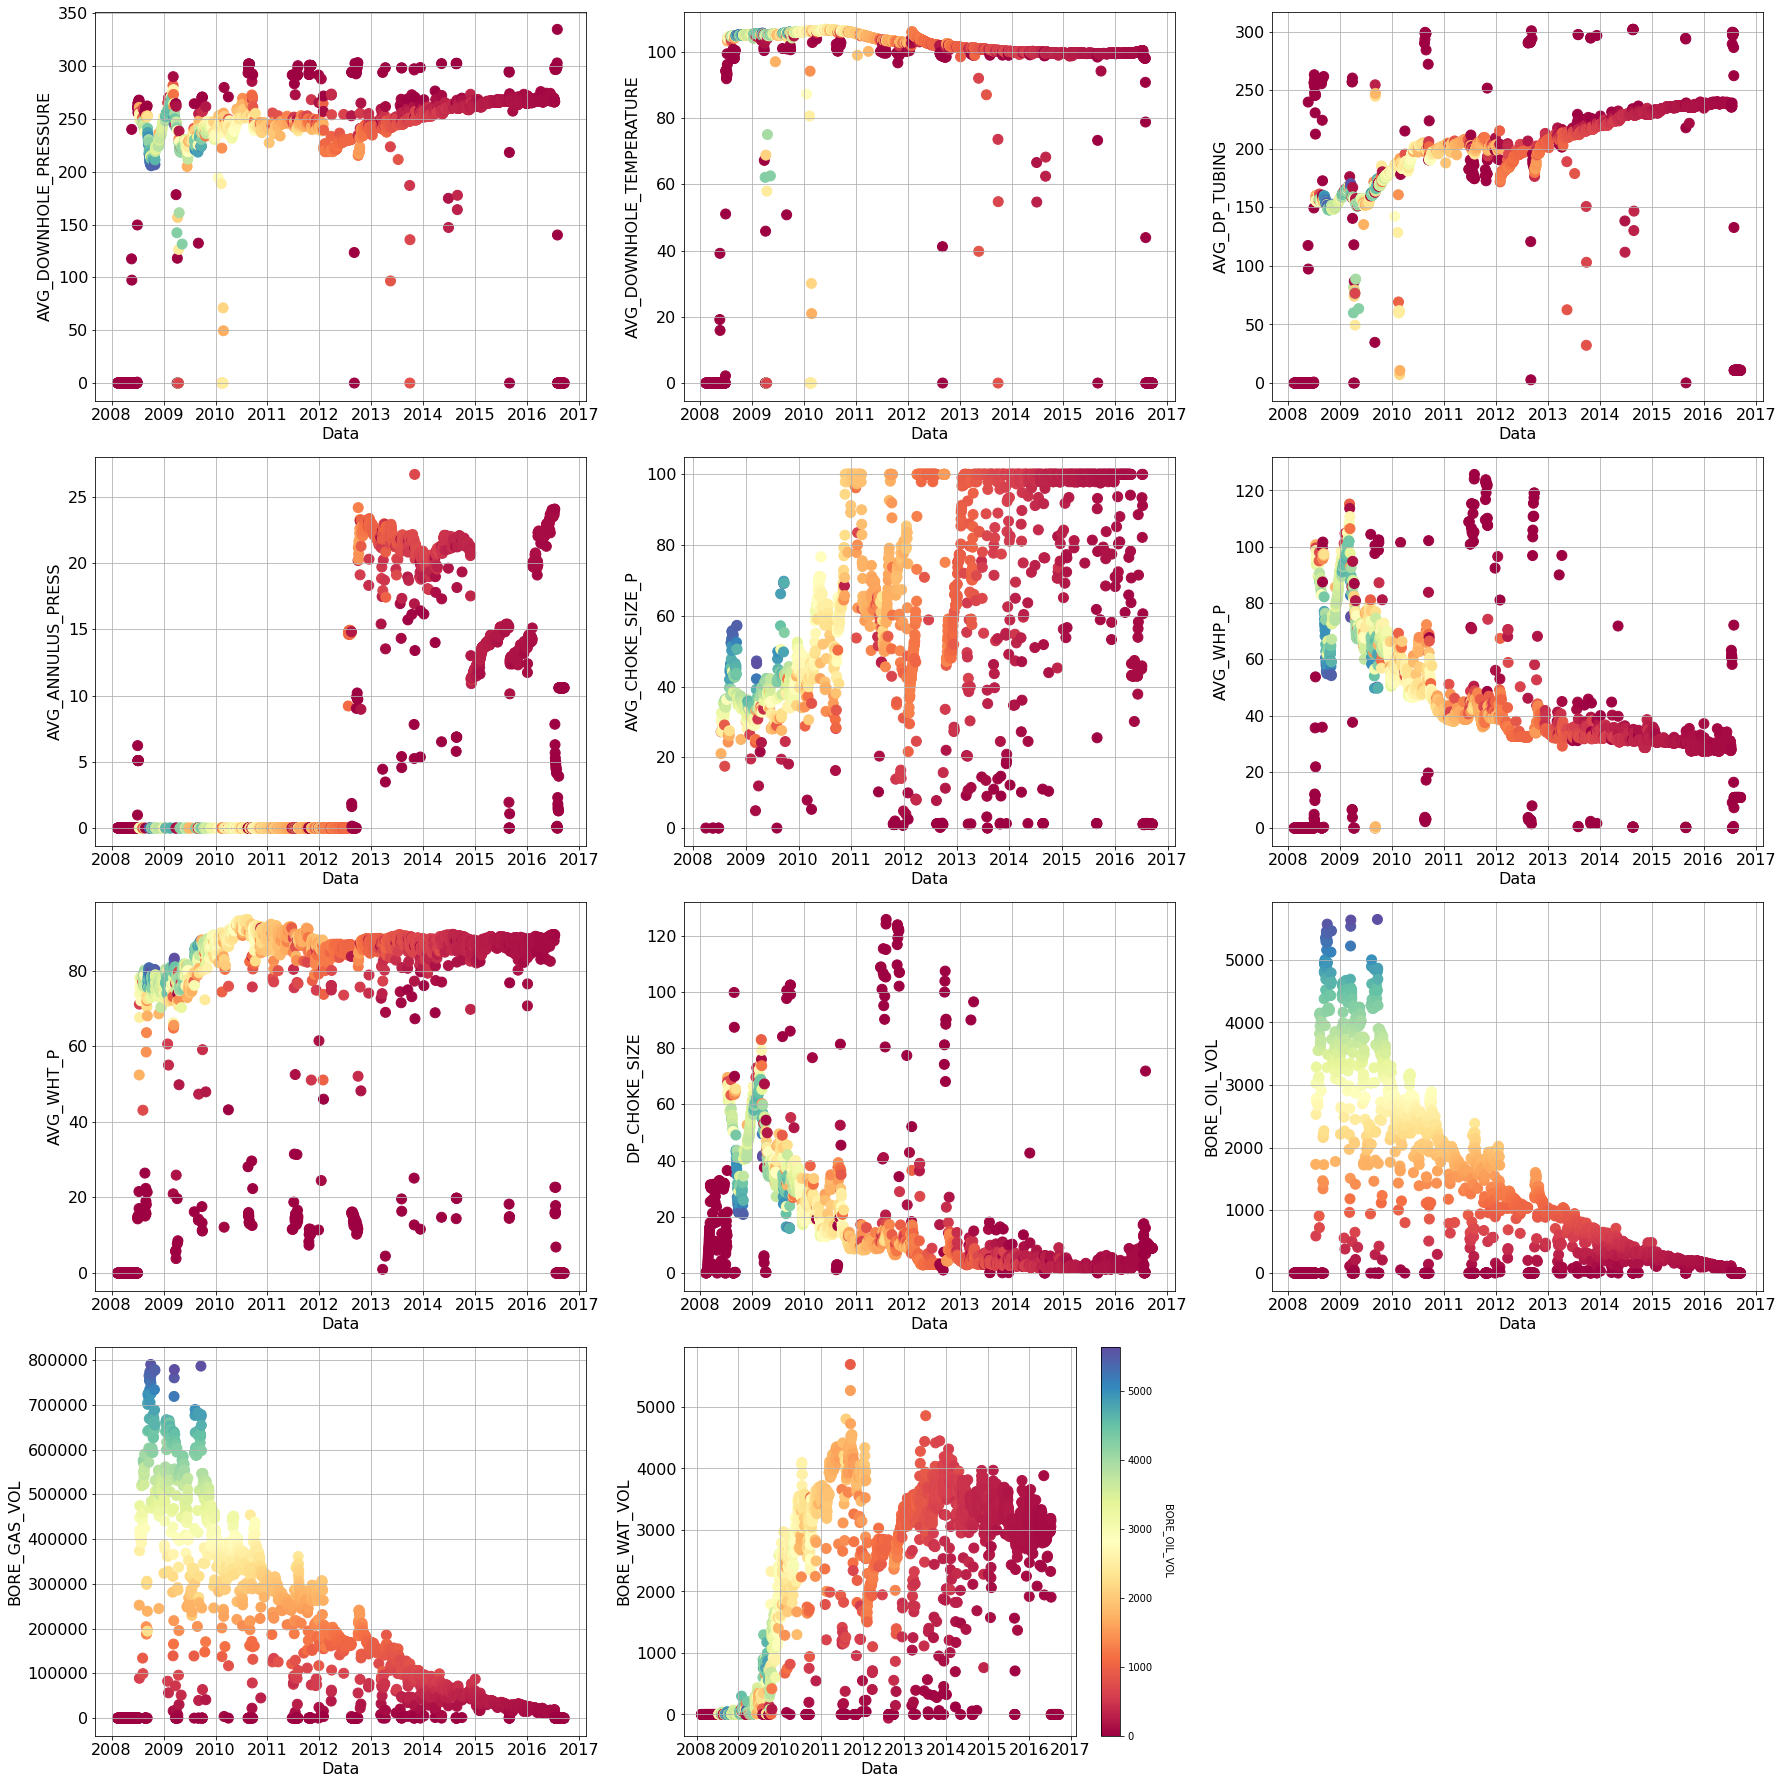

In [ ]:
# Gráfico que mostra para o poço 'NO 15/9-F-14 H', as variáveis de produção ao longo do tempo (a cor é de acordo com o valor de z)

grafico_variaveis_por_well(df1, well ='NO 15/9-F-14 H', x1 = 'DATEPRD',z = 'BORE_OIL_VOL')

# Exemplo 2: Ler arquivo de Perfuração


Nesta seção, trabalharemos com alguns arquivos da pasta WITSML, que contem logs de perfuração organizados em arquivos XML.
Inicialmente vamos descovrir quais são os poços disponíveis.

##Uma breve exploração


In [ ]:
#analise dos arquivos na pasta WITSML Realtime drilling data/

#Quais os poços contidos na pasta?

import pandas as pd

#listando tos os paths a partir da pasta 'WITSML Realtime drilling data' 
lista_wit = listar_arquivos(nome_blob = 'WITSML Realtime drilling data',)

#filtrando apenas as pastas e retirando os arquivos soltos
well_paths = [i.split('/')[1] for i in lista_wit if (len(i.split('/'))) >=3]

#guardando informação em data frame
well_paths = pd.DataFrame(columns = ['Paths'], data = well_paths)
print("Numero de sub pastas: {}".format(len(well_paths.Paths.unique())))
well_paths.value_counts()


Numero de sub pastas: 26


Paths                              
Norway-Statoil-NO 15_$47$_9-F-1 C      6985
Norway-Statoil-NO 15_$47$_9-F-11       4516
Norway-Statoil-NO 15_$47$_9-F-15       4029
Norway-Statoil-NO 15_$47$_9-F-12        814
Norway-Statoil-NO 15_$47$_9-F-14        774
Norway-Statoil-NO 15_$47$_9-F-5         663
Norway-StatoilHydro-15_$47$_9-F-10      297
Norway-Statoil-15_$47$_9-F-12           268
Norway-StatoilHydro-15_$47$_9-F-4       263
Norway-StatoilHydro-15_$47$_9-F-15S     217
Norway-StatoilHydro-15_$47$_9-F-14      210
Norway-Statoil-NO 15_$47$_9-F-4         182
Norway-StatoilHydro-15_$47$_9-F-5       153
Norway-StatoilHydro-15_$47$_9-F-15A     129
Norway-StatoilHydro-15_$47$_9-F-15      106
Norway-Statoil-NO 15_$47$_9-F-9         104
Norway-Statoil-15_$47$_9-F-7             89
Norway-Statoil-NO 15_$47$_9-F-7          86
Norway-StatoilHydro-15_$47$_9-F-9        71
Norway-NA-15_$47$_9-F-9 A                60
Norway-StatoilHydro-15_$47$_9-F-15B      27
NA-NA-15_$47$_9-F-5                     

Numero real de poços: 17


Text(0, 0.5, 'Poços')

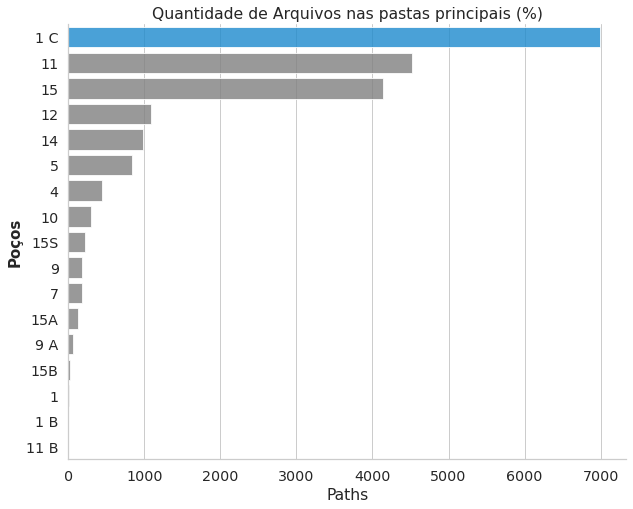

In [ ]:
#identificando poços singulares
well_paths['Well_id'] = well_paths.Paths.apply(lambda x: x.split('9-F-')[-1])   #Cria coluna com ids
print('Numero real de poços: {}'.format(len(well_paths.Well_id.unique())))      

import seaborn as sns
import matplotlib.pyplot as plt

#realizando contagem de arquivos por poço
ranking = well_paths.groupby('Well_id').count().sort_values(['Paths'], ascending = False)

sns.set(font_scale=1.3, style = "whitegrid")
fig = plt.figure(figsize=(10,8))
first_color = '#0091ea'
other_colors = '#808080'
palette1 = [first_color] + (len(well_paths.Well_id.unique())-1)*[other_colors]
ax = sns.barplot(x='Paths', 
                 y= ranking.index,
                 palette = palette1,
                 data= ranking,
                 alpha=0.8)
sns.despine()
plt.title('Quantidade de Arquivos nas pastas principais (%)')
plt.ylabel('Poços', fontsize = 15, weight = 'bold')


##Agora daremos uma olhada no poço F-10

In [ ]:
F10 =  listar_arquivos('WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10')
F10[:15]

['WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/_wellboreInfo/15_$47$_9-F-10 - Main Wellbore (B-924688)(NULL).xml',
 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00001.xml',
 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00002.xml',
 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00003.xml',
 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00004.xml',
 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00005.xml',
 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/MetaFileInfo.txt',
 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/2/1/00001.xml',
 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/2/1/00002.xml',
 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/2/MetaFileInfo.txt',
 'WITSML Realtime drilling data/No

In [ ]:
#O que tem no arquivo meta data?

container_name = 'volve'
blob_name = 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/MetaFileInfo.txt'
print_arquivo_texto(container_name, blob_name)


1  17.5 in. Section - MD Log(4)(L-937515-MD)

WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/MetaFileInfo.txt


In [ ]:
blob_name = 'WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00001.xml'
F10_101 = sas_blob_service.get_blob_to_text('volve', blob_name)                 #lendo o arquivo
F10_101.content

'<?xml version="1.0" encoding="UTF-8"?><logs xmlns="http://www.witsml.org/schemas/1series" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.4.1.1"><log uidWell="W-924688" uidWellbore="B-924688" uid="L-937515-MD"><nameWell>15/9-F-10</nameWell><nameWellbore>15/9-F-10 - Main Wellbore</nameWellbore><name>17.5 in. Section - MD Log</name><serviceCompany>Schlumberger</serviceCompany><runNumber>4</runNumber><pass>Drilling</pass><creationDate>2009-04-20T20:13:00.000Z</creationDate><indexType>measured depth</indexType><startIndex uom="m">1314.362</startIndex><endIndex uom="m">1591.858</endIndex><direction>increasing</direction><indexCurve>DEPTH</indexCurve><priv_dTimPriority>2009-04-20T20:13:00.000Z</priv_dTimPriority><logCurveInfo uid="GS_G_NC4"><mnemonic>GS_G_NC4</mnemonic><unit>ppm</unit><minIndex uom="m">1401.001</minIndex><maxIndex uom="m">1591.001</maxIndex><curveDescription>Nor-butane (NC4)</curveDescription><dataSource>GeoService</dataSource><typeLogData>double</typeLogDa

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(F10_101.content, 'xml')                      #Carregando o arquivo xml
set([str(tag.name) for tag in soup.find_all()])                   #imprimindo todas as tags 

{'commonData',
 'creationDate',
 'curveDescription',
 'dTimCreation',
 'dTimLastChange',
 'data',
 'dataSource',
 'direction',
 'endIndex',
 'indexCurve',
 'indexType',
 'log',
 'logCurveInfo',
 'logData',
 'logs',
 'maxIndex',
 'minIndex',
 'mnemonic',
 'mnemonicList',
 'name',
 'nameWell',
 'nameWellbore',
 'pass',
 'priv_dTimPriority',
 'priv_dTimReceived',
 'priv_ipLastChange',
 'priv_ipOwner',
 'priv_userLastChange',
 'priv_userOwner',
 'runNumber',
 'serviceCompany',
 'sourceName',
 'startIndex',
 'typeLogData',
 'unit',
 'unitList'}

O nosso XMl está carregado na variável

In [ ]:
soup.find_all('mnemonicList')#.text#.split(',')

[<mnemonicList>DEPTH,GS_G_NC4,GS_MTOA,GS_DRTV,INCL_CONT_RT,SHKRSK_RT,GS_G_IC4,TRPM_RT,PDTF,GS_G_C2,PD_GRAV,AJAM_MWD,GTF_RT,SPM1,GS_G_C1,TVDE,BITRUN,GS_MWTI,ATMP_RT,THKD,HKLI,ARC_GR_RT,TFLO,DVER,APRS_RT,GS_SPPA,GS_TQA,SPM2,P28H_RT,PDSHKRSK,CRPM_RT,GS_DXC,AZIM_CONT_RT,GS_GASA,GS_G_NC5,GS_BDTI,GS_HKLD,GS_TREV,HKLD,SPPA,A28H_RT,PDINCL,GS_TVA,ROP,GS_SWOB,ARC_GR_UNC_RT,P40H_RT,ROP5,GS_DVER,PASS_NAME,RPM,PD_GRAV_BHC,A40H_RT,GS_BDDI,GS_G_C3,SPM3,RGX_RT,GS_ROP,GS_TFLO,HKLO,GS_TDH,SHKPK_RT,TSPM,Stick_RT,BDTI,SHKTOT_RT,GS_RPM,GS_G_IC5,TQA,PMPT,ECD_ARC_RT,DMEA,DEPT,PD_PRDS,GS_MDOA,RHX_RT,SWOB,DRPM</mnemonicList>]

Os mnemônicos são um padrão de nome de variáveis para compartilhamento de dados em petróleo.

http://www.petrospec-technologies.com/resource/wits_doc.htm

https://www.apps.slb.com/cmd/index.aspx

Esse WITSML possui informações da mecânica da perfuração indexado pela produnfidade. Dados com essa indexação podem ser usados para avaliar o 'status' da operação: se uma formação diferente foi atingida, etc.

In [ ]:
len(soup.find_all('data')[0].text.split(','))    #dados

78

In [ ]:
units = soup.find_all('unitList')[0].text.split(',')  #unidades
print(units)

['m', 'ppm', 'degC', 'm', 'dega', 'unitless', 'ppm', 'rpm', 'dega', 'ppm', '1/s', 'unitless', 'dega', '1/min', 'ppm', 'm', 'unitless', 'g/cm3', 'degC', 'kkgf', 'kkgf', 'gAPI', 'L/min', 'm', 'kPa', 'kPa', 'kN.m', '1/min', 'ohm.m', 'unitless', 'rpm', 'unitless', 'dega', '%', 'ppm', 'h', 'kkgf', 'unitless', 'kkgf', 'kPa', 'ohm.m', 'dega', 'm3', 'm/h', 'kkgf', 'gAPI', 'ohm.m', 'm/h', 'm', 'unitless', 'rpm', 'gAPI', 'ohm.m', 'm', 'ppm', '1/min', 'unitless', 'm/h', 'L/min', 'kkgf', 'degC', 'm/s2', '1/min', 'rpm', 'h', 'unitless', 'rpm', 'ppm', 'kN.m', 'h', 'g/cm3', 'm', 'm', '%', 'g/cm3', 'unitless', 'kkgf', 'rpm']


##Juntandos dos os witsml da pasta

In [ ]:
def group_logs(blob_name):

  ''' blob_name: pasta contendo os arquivos WITSML da corrida de perfuração
  '''

  list_files = listar_arquivos(blob_name)
  data_master = pd.DataFrame()
  import numpy as np
  for x, f_run in enumerate(list_files):
    run = sas_blob_service.get_blob_to_text('volve', f_run)
    print(f_run)
    soup = BeautifulSoup(run.content, 'xml')
    print('Nome: ' + soup.find_all('name')[0].text )
    print('Nome Wellbore: ' + soup.find_all('nameWellbore')[0].text )
    print('Corrida: ' + soup.find_all('runNumber')[0].text +'\n')
    mnemonics = soup.find_all('mnemonicList')[0].text.split(',')
    units = soup.find_all('unitList')[0].text.split(',')
    header = [i +' - '+ j for i, j in zip(mnemonics, units)]
    data = soup.find_all('data')
    df = pd.DataFrame(data = [row.text.split(',') for row in data])
  
    df.columns = header

    df = df.replace('', np.NaN)
      
    if x == 0:
        data_master = df
    else:
        data_master = pd.concat([data_master, df], sort = False)
    
  return data_master

In [ ]:
data_master = group_logs('WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1')

WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00001.xml
Nome: 17.5 in. Section - MD Log
Nome Wellbore: 15/9-F-10 - Main Wellbore
Corrida: 4

WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00002.xml
Nome: 17.5 in. Section - MD Log
Nome Wellbore: 15/9-F-10 - Main Wellbore
Corrida: 4

WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00003.xml
Nome: 17.5 in. Section - MD Log
Nome Wellbore: 15/9-F-10 - Main Wellbore
Corrida: 4

WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00004.xml
Nome: 17.5 in. Section - MD Log
Nome Wellbore: 15/9-F-10 - Main Wellbore
Corrida: 4

WITSML Realtime drilling data/Norway-StatoilHydro-15_$47$_9-F-10/1/log/1/1/1/00005.xml
Nome: 17.5 in. Section - MD Log
Nome Wellbore: 15/9-F-10 - Main Wellbore
Corrida: 4



In [ ]:
print('Total Length of DataFrame: ' + str(len(data_master)))
data_master.head(10)

Total Length of DataFrame: 50000


DEPTH - m GS_G_NC4 - ppm  ... SWOB - kkgf DRPM - rpm
0  1314.362            NaN  ...         NaN        NaN
1  1314.514            NaN  ...         NaN        NaN
2  1314.666            NaN  ...         NaN        NaN
3  1314.819            NaN  ...         NaN        NaN
4  1314.971            NaN  ...         NaN        NaN
5  1315.124            NaN  ...         NaN        NaN
6  1315.276            NaN  ...         NaN        NaN
7  1315.428            NaN  ...         NaN        NaN
8  1315.581            NaN  ...         NaN        NaN
9  1315.733            NaN  ...         NaN        NaN

[10 rows x 78 columns]

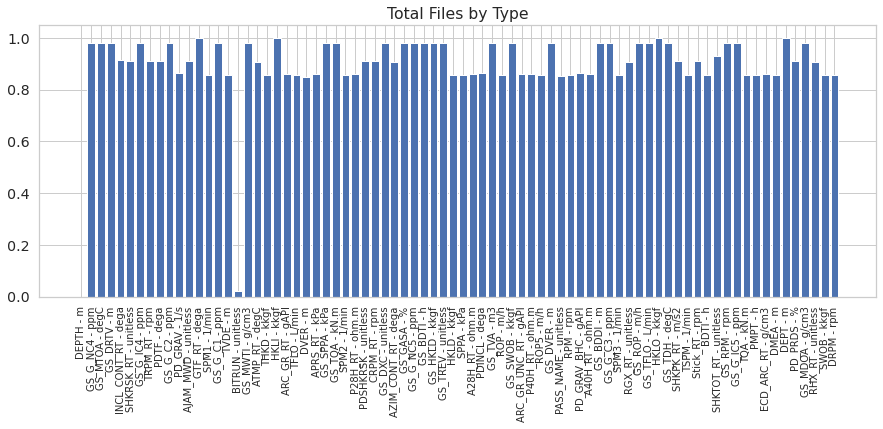

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(range(len(data_master.isna().sum())), list(data_master.isna().sum().values / len(data_master)), align='center')
plt.xticks(range(len(data_master.isna().sum())), data_master.columns.to_list(), rotation='vertical', fontsize=10 )
plt.title('Total Files by Type')
plt.show()

Vamos inteporlar alguns dados faltantes

In [ ]:
for col in data_master:
    data_master[col] = pd.to_numeric(data_master[col], errors='coerce')
data_master = data_master.interpolate(axis = 0, limit = 5)
data_master.head()


DEPTH - m  GS_G_NC4 - ppm  ...  SWOB - kkgf  DRPM - rpm
0   1314.362             NaN  ...          NaN         NaN
1   1314.514             NaN  ...          NaN         NaN
2   1314.666             NaN  ...          NaN         NaN
3   1314.819             NaN  ...          NaN         NaN
4   1314.971             NaN  ...          NaN         NaN

[5 rows x 78 columns]

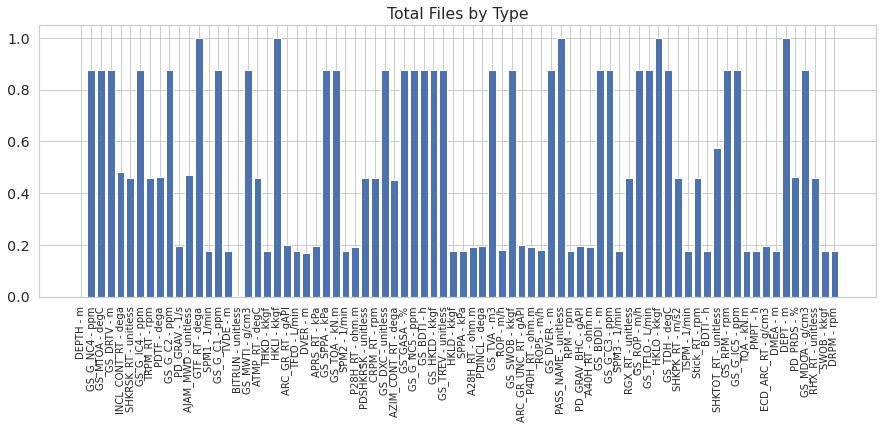

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(range(len(data_master.isna().sum())), list(data_master.isna().sum().values / len(data_master)), align='center')
plt.xticks(range(len(data_master.isna().sum())), data_master.columns.to_list(), rotation='vertical', fontsize=10 )
plt.title('Total Files by Type')
plt.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

var =['SWOB - kkgf', 'ROP - m/h', 'THKD - kkgf']

fig = make_subplots(rows=1, cols=3, shared_yaxes=True)

col=1
for x in var:

  fig.add_trace(
      go.Scatter(x=data_master[x], y=data_master['DEPTH - m'], name = x),
      row=1, col=col,
  )
  col+=1


fig.update_yaxes(autorange="reversed")
fig.update_layout(height=1200, width=800,
                  title_text="Perfis")
fig.show(renderer="colab")
